### Pow(x, n)

https://leetcode.com/explore/learn/card/binary-search/137/conclusion/982/

Implement pow(x, n), which calculates x raised to the power n (i.e., xn).

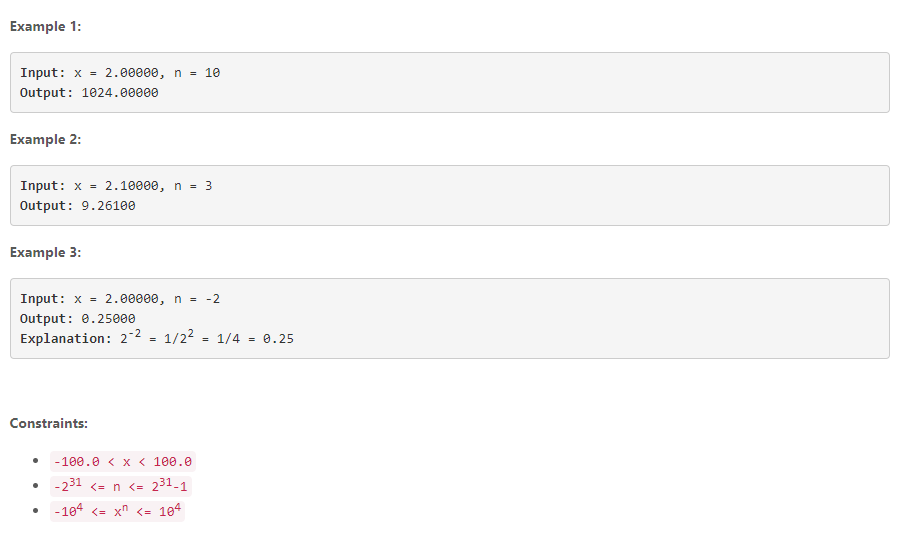

##### Accepted Half Power
```cpp
class Solution {
public:
    
    // Half fast power
    double helper(double x, int n){
        if(n==0){
            return 1;
        }
        if(n==1){
            return x;
        }
        if(n==-1){
            return 1/x;
        }
        
        
        double half = helper(x, n/2);
        
        
        if(n%2==0){
            return half*half;
        }else{
            if(n>0){
                return half*half*x;
            }else{
                return half*half*1/x;
            }
        }
            
        
        
    }
    
    
    
    double myPow(double x, int n) {
            return helper(x,n);
    }

};
```

### Valid Perfect Square
https://leetcode.com/explore/learn/card/binary-search/137/conclusion/978/

Given a positive integer num, write a function which returns True if num is a perfect square else False.

Follow up: Do not use any built-in library function such as sqrt.

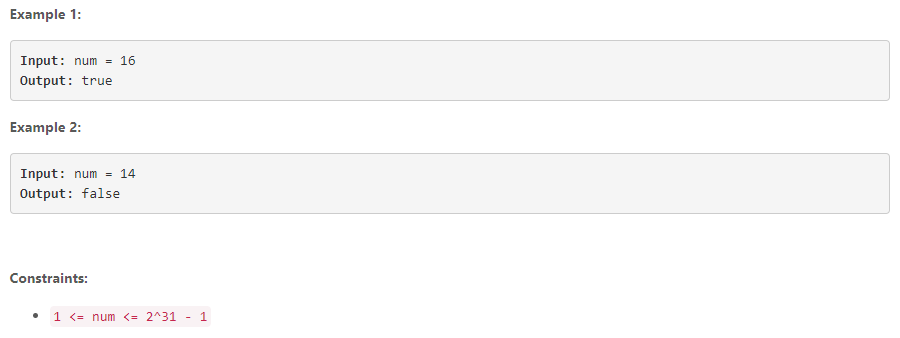

In [2]:
2**15

32768

In [3]:
32768*1.414

46333.952

In [4]:
import math

In [5]:
math.sqrt(2)

1.4142135623730951

In [8]:
32768*1.414213562373

46340.95001183847

In [9]:
46341*46341

2147488281

In [10]:
2**31-1

2147483647

In [11]:
46340*46340

2147395600

##### Accepted v1
```cpp
class Solution {
public:
    bool isPerfectSquare(int num) {
        
        float cur = num;
        int i = 0;
        while(cur>2){
            cur = cur/2;
            i++;
        }
        int lower;
        int upper;
        if(i==30){
           lower = pow(2,15);
           // 2**15 * 1.414213562373
           upper = 46340;
        }else{
            lower = pow(2,i/2);
            upper = pow(2,i/2)*2;
        }
        
        int mid;
        int s;
        while(lower+1<upper){
            mid = (lower+upper)/2;
            s = mid*mid;
            if(s ==num){
                return true;
            }else if(s > num){
                upper = mid;
            }else{
                lower = mid;
            }
        
        // cout<<lower<<" lower\n";
        // cout<<upper<<" upper\n";
        }
        
        if(lower*lower == num){
            return true;
        }
        
        if(upper*upper == num){
            return true;
        }
        
        return false;
        
        // cout<<cur<<" cur\n";
        // cout<<lower<<" lower\n";
        // cout<<upper<<" upper\n";

    }
};

```

### Solution
https://leetcode.com/problems/valid-perfect-square/solution/


##### Approach 1: Binary Search
```java
class Solution {
  public boolean isPerfectSquare(int num) {
    if (num < 2) {
      return true;
    }

    long left = 2, right = num / 2, x, guessSquared;
    while (left <= right) {
      x = left + (right - left) / 2;
      guessSquared = x * x;
      if (guessSquared == num) {
        return true;
      }
      if (guessSquared > num) {
        right = x - 1;
      } else {
        left = x + 1;
      }
    }
    return false;
  }
}
```


##### Approach 2: Newton's Method
```java
class Solution {
  public boolean isPerfectSquare(int num) {
    if (num < 2) return true;

    long x = num / 2;
    while (x * x > num) {
      x = (x + num / x) / 2;
    }
    return (x * x == num);
  }
}
```

## Find Smallest Letter Greater Than Target
https://leetcode.com/explore/learn/card/binary-search/137/conclusion/977/

Given a characters array letters that is sorted in non-decreasing order and a character target, return the smallest character in the array that is larger than target.

Note that the letters wrap around.

For example, if target == 'z' and letters == ['a', 'b'], the answer is 'a'.

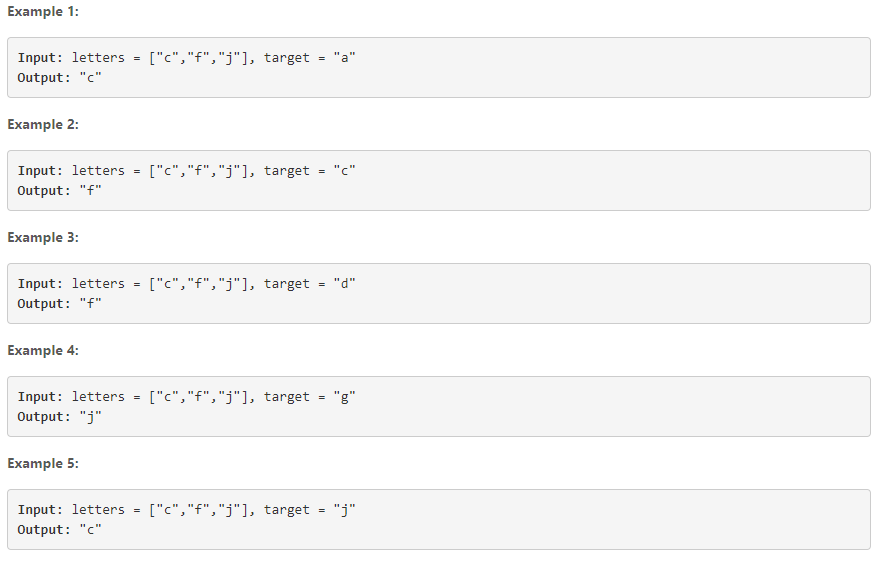

##### Accepted v1
```cpp
class Solution {
public:
    char nextGreatestLetter(vector<char>& letters, char target) {
        
        
        int left = 0;     
        int right = letters.size()-1;
        int mid;
        
        if(target < letters[left] or target >= letters[right]){
                return letters[left];
            }
        while(left+1<right){
            mid = left + (right-left)/2;
            if(letters[mid]<=target){
                left = mid;
            }else{
                right = mid;
            }
        }
        
        // cout<<left<<" left\n";
        // cout<<right<<" right\n";
        return letters[right];
    }
};
```

### Solutions
https://leetcode.com/problems/find-smallest-letter-greater-than-target/solution/
    

##### Approach #1: Record Letters Seen [Accepted]

```java
class Solution {
    public char nextGreatestLetter(char[] letters, char target) {
        boolean[] seen = new boolean[26];
        for (char c: letters)
            seen[c - 'a'] = true;

        while (true) {
            target++;
            if (target > 'z') target = 'a';
            if (seen[target - 'a']) return target;
        }
    }
}
```

##### Approach #2: Linear Scan [Accepted]
```java
class Solution {
    public char nextGreatestLetter(char[] letters, char target) {
        for (char c: letters)
            if (c > target) return c;
        return letters[0];
    }
}
```

##### Approach #3: Binary Search [Accepted]
```java
class Solution {
    public char nextGreatestLetter(char[] letters, char target) {
        int lo = 0, hi = letters.length;
        while (lo < hi) {
            int mi = lo + (hi - lo) / 2;
            if (letters[mi] <= target) lo = mi + 1;
            else hi = mi;
        }
        return letters[lo % letters.length];
    }
}
```